In [2]:
# The first lines of your code should import all the libraries and functions you are using throughout your code:
import os
import scipy
import numpy as np  # This way of importing prevents us from typing `numpy` every time. Instead, we can just type `np`
import matplotlib.pyplot as plt  # Importing pyplot from matplotlib
from scipy.optimize import curve_fit

In [4]:
data = np.load(r"C:\Users\User\Documents\Fisica compu\Compu\datos.npy")


longitud = np.array(data[:,0])
errlong = np.array(data[:,1])

medidas = np.array(data[:,2:])

#compruebo que los datos esten bien
print(longitud)
print(medidas)



[1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
[[20.05640437 20.05963423 20.02880293 20.04919752 20.05982868 20.11173776
  20.05356595 20.04985033 20.11175868 20.04829324]
 [21.03777478 21.04944117 21.02840233 21.06328741 21.04521451 21.02027374
  21.04115401 21.02989434 21.05528146 21.04242142]
 [21.93958408 21.97215824 22.00763047 21.99300118 21.98663794 21.98032397
  21.96255416 21.99397498 21.96471993 21.9828847 ]
 [22.86238279 22.87286153 22.88663756 22.90760653 22.86880205 22.86750249
  22.86246088 22.87985097 22.85209103 22.85472628]
 [23.75487852 23.73839293 23.74543798 23.77058917 23.75024196 23.744397
  23.73288188 23.75120172 23.75843325 23.72692261]
 [24.58795283 24.58688659 24.59157578 24.5610537  24.59750397 24.56669837
  24.57771734 24.58279614 24.57137225 24.5737635 ]
 [25.38105036 25.43665015 25.39019652 25.38059754 25.36748456 25.39635288
  25.38204713 25.37662751 25.39220239 25.37077851]
 [26.14205458 26.14853358 26.11334155 26.1595095  26.14412089 26.18612295
  26.14

In [5]:

def promedio(lista):
    suma=0

    media = np.array([])
    for j in range (0,11,1):
        for i in range (0,10,1):
            suma+=lista[j][i]
        suma=suma/10
        media = np.append(media,suma)
        suma=0
    return media

#Considero que el error u_b << u_a entonces u_c=u_a
def error(Lista):
    error = np.array([])
    for j in range (0,11,1):
        error = np.append(error, np.std(Lista[j])/np.sqrt(10))
    return error

#compruebo que las funciones esten bien
print(promedio(medidas))
print(error(medidas))


[20.06290737 21.04131452 21.97834696 22.87149221 23.7473377  24.57973204
 25.38739876 26.15115638 26.91505421 27.65583333 28.38193433]
[0.00815827 0.00388944 0.00581869 0.00495033 0.00382359 0.00348224
 0.00586584 0.0057515  0.00569477 0.00518035 0.00843833]


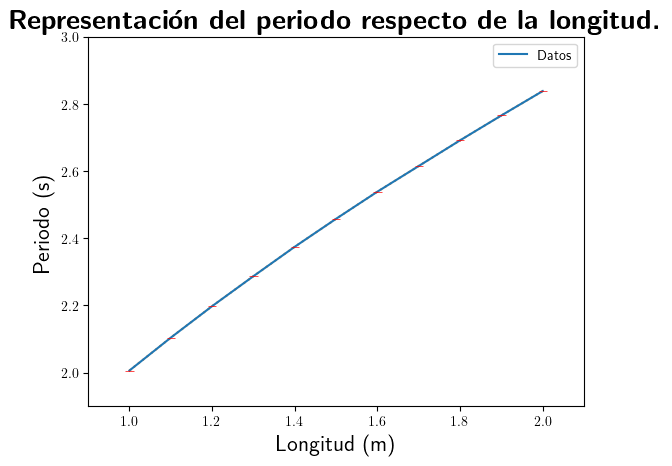

[2.00629074 2.10413145 2.1978347  2.28714922 2.37473377 2.4579732
 2.53873988 2.61511564 2.69150542 2.76558333 2.83819343]


In [6]:
#periodo 
T = np.array
T = promedio(medidas)/10
ErrorT = error(medidas)/10
plt.rcParams['text.usetex'] = True  

  
        

fig, ax = plt.subplots()
ax.plot(longitud, T, label = 'Datos')
ax.set_xlabel(r'Longitud (m)', fontsize = 16)           
ax.set_ylabel(r'Periodo (s)', fontsize = 16)  
ax.legend()                                     
ax.set_title(r'\textbf{Representación del periodo respecto de la longitud.}', fontsize = 20) 
ax.errorbar(longitud, T, xerr = errlong, yerr = ErrorT, ecolor= 'r', elinewidth = 0.5, 
            barsabove=True, linestyle = 'dotted')
ax.axis([0.9,2.1,1.9,3]) 
plt.show()

#compuebo que el periodo esten bien
print(T)

In [8]:
#ajuste

def func(x, a):
    return a * x

ErrorTcuad=2*T*ErrorT
popt, pcov = curve_fit(func, longitud, T**2,sigma=ErrorTcuad, absolute_sigma=True)
error_ajuste = np.sqrt(pcov[0, 0])
#compruebo que el ajuste este bien
print(popt)
print(error_ajuste)


error_G = (4 * np.pi**2 / popt**2) * error_ajuste
G=4*np.pi**2/popt


#Saco los datos de G con su error 
print("El valor de la gravedad es:",G)
print("La incertidumbre de la gravedad es:",error_G)


[4.02610177]
0.0004985320934560173
El valor de la gravedad es: [9.80561839]
La incertidumbre de la gravedad es: [0.00121418]
